# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.

In [65]:
import pandas as pd
import numpy as np
import wptools
import os
import requests
import glob
import json
from PIL import Image
from io import BytesIO
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt

%matplotlib inline

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [66]:
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [67]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
df_2 = pd.read_csv('image-predictions.tsv', '\t')
df_2.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [68]:
tweets_list = []
with open ('tweet-json.txt', 'r')as file:
    for line in file:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count = data['retweet_count']
        favorite_count = data['favorite_count']
        tweets_list.append({'tweet_id': tweet_id, 'retweet_count': retweet_count, 'favorite_count': favorite_count})
df_3 = pd.DataFrame(tweets_list, columns=['tweet_id', 'retweet_count', 'favorite_count'])
df_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [69]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [70]:
df_1.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [71]:
df_1.expanded_urls.isna().sum()

59

In [72]:
missing_url = df_1.expanded_urls.isnull() & df_1.in_reply_to_status_id.isna() & df_1.retweeted_status_id.isna()
df_1[missing_url][['tweet_id', 'text', 'expanded_urls']]

,tweet_id,text,expanded_urls
375,828361771580813312,Beebop and Doobert should start a band 12/10 w...,NaN
707,785515384317313025,"Today, 10/10, should be National Dog Rates Day",NaN
1445,696518437233913856,Oh my god 10/10 for every little hot dog pupper,NaN


In [73]:
df_1[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [74]:
df_1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [75]:
df_1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [76]:
df_1['name'].value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
Oliver         11
Penny          10
Tucker         10
Lola           10
Winston         9
Bo              9
Sadie           8
the             8
Bailey          7
Buddy           7
Daisy           7
Toby            7
an              7
Milo            6
Scout           6
Dave            6
Oscar           6
Leo             6
Bella           6
Rusty           6
Koda            6
Stanley         6
Jax             6
Jack            6
Bentley         5
             ... 
Cupid           1
Brandonald      1
Sprout          1
Jim             1
Norman          1
Rudy            1
Maya            1
his             1
Chuq            1
Batdog          1
Christoper      1
Timofy          1
Oddie           1
Laela           1
Ruffles         1
Zeus            1
Barney          1
Ronnie          1
Aldrick         1
Tito            1
Halo            1
Carper          1
Major           1
Monty           1
Mo        

In [77]:
df_1['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [78]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [79]:
df_2['jpg_url'].isnull().sum()

0

In [80]:
df_2.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Siberian_husky                20
Staffordshire_bullterrier     20
German_shepherd               20
web_site                      19
Cardigan                      19
Shetland_sheepdog             18
Maltese_dog                   18
teddy                         18
Eskimo_dog                    18
beagle                        18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
kuvasz                        16
Italian_greyhound             16
          

In [81]:
len(df_2.p3.value_counts()) 

408

In [82]:
df_2.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [83]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [84]:
df_3.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


## After assessing the files using both programmatic and visual assessment, I came up with the following

### Quality issues
twitter-archive-enhanced.csv
1. timestamp is of datatype object, should be of date datatype

2. rows containing retweet and "in reply to users' tweet" are not needed

3. some dogs were rated over 10 while others were rated with different denominators which is an issue

4. some numerators were rated too high which is also an issue

5. tweet_id is int

6. source has html tag attached

7. Some of the rows in the name column are possibly wrong, e.g. "a", "an", "in". These words are all the 3rd word in the tweet text. Also, the first leetter of the dog names are capitalized, so words that begin with lower case are not names

8. the names in the dog breed column are in consistent. some are uppercase while some are lowercase 

### Tidiness issues
twitter-archive-enhanced.csv
1. dog stage categorised in 4 different columns which does not conform to tidy data

2. The key point indicates that we’re only interested in “original tweets”, no “retweets”; columns related to retweet and replies wont be necessary for our analysis.

image-predictions.tsv
3. The dog breed prediction with the highest confidence level can be combined with the twitter-archive-enhanced table as the twitter-archive-enhanced table contains information that is all about the dog.

tweet-json.txt
4. tweet-json.txt should be merged with twitter-archive-enhanced.csv

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [85]:
# Make copies of original pieces of data
twitter_archive_clean = df_1.copy()
image_prediction_clean = df_2.copy()
tweet_json_clean = df_3.copy()

### Issue: Quality issue no 2 and Tidiness issue no 2: Drop retweet and reply columns

#### Define: 
Drop Rows containing retweet and replies. Columns related to retweet and replies will also be dropped since they wont be necessary for our analysis. 

#### Code

In [86]:
reply = list(twitter_archive_clean[twitter_archive_clean["in_reply_to_status_id"].isnull()==False].index)

twitter_archive_clean.drop(axis=0, index=reply, inplace=True)

In [87]:
twitter_archive_clean.drop(['in_reply_to_user_id','in_reply_to_status_id'],
                           axis=1,inplace=True)

In [88]:
retweet = list(twitter_archive_clean[twitter_archive_clean["retweeted_status_id"].isnull()==False].index)

twitter_archive_clean.drop(axis=0, index=retweet, inplace=True)

In [89]:
twitter_archive_clean.drop(['retweeted_status_id', 'retweeted_status_user_id',
                            'retweeted_status_timestamp'],axis=1, inplace=True)

#### Test

In [90]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


### Issue: Tidiness issue no 1: Dog stage split in 4 columns

#### Define: 
Melt the 4 columns representing dog stage into one.

#### Code

In [91]:
twitter_archive_clean['dog_stage']=None
twitter_archive_clean['dog_stage'] = twitter_archive_clean.doggo + twitter_archive_clean.floofer + twitter_archive_clean.pupper + twitter_archive_clean.puppo

In [92]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].map(lambda x: x.replace("None",""))

In [93]:
twitter_archive_clean['dog_stage'].value_counts()

                1761
pupper           221
doggo             72
puppo             23
floofer            9
doggopupper        9
doggofloofer       1
doggopuppo         1
Name: dog_stage, dtype: int64

It appears that 11 dogs have more than one name or we have more than one dog in the picture.

In [94]:
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
twitter_archive_clean.loc[twitter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [95]:
twitter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis =1, inplace=True)

#### Test

In [96]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             2097 non-null object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


### Issue #Tidiness no 3: Combining the dog breed with the highest confidence level with tweet_archive table

#### Define 
create 2 columns breed and confidence, select the breed with the highest confidence level and assign to breed, then the assign the corresponding confidence level to confidence. Default breed and confidence will be set to none and 0 respectively.

Change data type for confidence level to int after multiplying by 100 to get the percentage value

Then drop the columns from image-prediction after merging them with twitter_archive

#### Code

In [97]:
conditions = [(image_prediction_clean['p1_dog'] == True), (image_prediction_clean['p2_dog'] == True), (image_prediction_clean['p3_dog'] == True)]
choices_breed = [image_prediction_clean['p1'], image_prediction_clean['p2'], image_prediction_clean['p3']]
choices_confidence = [image_prediction_clean['p1_conf'], image_prediction_clean['p2_conf'], image_prediction_clean['p3_conf']]

image_prediction_clean['breed'] = np.select(conditions, choices_breed, default = 'none')
image_prediction_clean['confidence'] = np.select(conditions, choices_confidence, default = 0)
columns = ['tweet_id', 'breed', 'confidence']

twitter_archive_clean = pd.merge(twitter_archive_clean, image_prediction_clean[columns], on = 'tweet_id', how = 'inner')
twitter_archive_clean.confidence = (twitter_archive_clean.confidence * 100).astype(int)

image_prediction_clean.drop(['breed', 'confidence'], axis = 1, inplace = True)

#### Test

In [98]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 11 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
breed                 1971 non-null object
confidence            1971 non-null int64
dtypes: int64(4), object(7)
memory usage: 184.8+ KB


### Issue: Tidiness issue no 4:  json.txt data should be added to twitter_archive

#### Define: 
merge twitter_archive dataframe with tweet_json dataframe

#### Code

In [99]:
twitter_archive_clean = pd.merge(twitter_archive_clean, tweet_json_clean, on = 'tweet_id', how = 'left')

#### Test

In [100]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 13 columns):
tweet_id              1971 non-null int64
timestamp             1971 non-null object
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
breed                 1971 non-null object
confidence            1971 non-null int64
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
dtypes: int64(6), object(7)
memory usage: 215.6+ KB


### Quality issue no 1 & 5: Timestamp is of type object. Tweet_id is of type int

#### Define
convert timestamp to datetime. convert tweet_id to string since we wont be performing calculations with it

#### Code

In [101]:
twitter_archive_clean.timestamp = twitter_archive_clean.timestamp.astype('datetime64')
twitter_archive_clean.tweet_id = twitter_archive_clean.tweet_id.astype(str)

#### Test

In [102]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1970
Data columns (total 13 columns):
tweet_id              1971 non-null object
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null int64
rating_denominator    1971 non-null int64
name                  1971 non-null object
dog_stage             1971 non-null object
breed                 1971 non-null object
confidence            1971 non-null int64
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 215.6+ KB


### Issue # Quality issue no 6: Source has html tag attached

#### Define
remove tags surrounding the text

#### Code

In [103]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract('^<a.+>(.+)</a>$')

#### Test

In [104]:
twitter_archive_clean.source.value_counts()

Twitter for iPhone    1932
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

### Quality issue no 7: most likely words were extracted as names in the name column

#### Define
Replace names that begin with small letters with None

#### Code

In [105]:
lowercase_names = twitter_archive_clean.name.str.contains('^[a-z]', regex = True)
twitter_archive_clean.loc[lowercase_names, 'name'] = "None"

#### Test

In [106]:
twitter_archive_clean[lowercase_names].name.value_counts()

None    98
Name: name, dtype: int64

In [107]:
twitter_archive_clean.name.value_counts()

None            622
Charlie          11
Lucy             10
Cooper           10
Oliver           10
Tucker            9
Penny             9
Winston           8
Sadie             8
Toby              7
Lola              7
Daisy             7
Bo                6
Jax               6
Bella             6
Koda              6
Stanley           6
Louis             5
Chester           5
Dave              5
Milo              5
Buddy             5
Rusty             5
Leo               5
Oscar             5
Scout             5
Bailey            5
Archie            4
Duke              4
George            4
               ... 
Laika             1
Tito              1
Maya              1
Batdog            1
Holly             1
Laela             1
Christoper        1
Deacon            1
Acro              1
JD                1
Sky               1
Tove              1
Bubba             1
Filup             1
Cleopatricia      1
Ken               1
Brian             1
Covach            1
Sweet             1


### Quality issue no 3: Some denominator_ratings are not equal to 10

#### Define

drop all rows with denominators not equal to 10 since they are few

#### Code

In [108]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_denominator == 10]

#### Test

In [109]:
twitter_archive_clean.rating_denominator.value_counts()

10    1954
Name: rating_denominator, dtype: int64

### Quality issue no 4: Some numerators were rated too high

#### Define
Since the numerators that are above 14 are not so much, we can consider them outliers and delete them.

#### Code

In [110]:
mask = twitter_archive_clean.rating_numerator >= 15
twitter_archive_clean[mask].rating_numerator.value_counts().sort_index(ascending = False)

1776    1
420     1
75      1
27      1
26      1
Name: rating_numerator, dtype: int64

In [111]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean.rating_numerator < 15]

#### Test

In [112]:
twitter_archive_clean.rating_numerator.value_counts().sort_index(ascending = False)

14     33
13    253
12    446
11    392
10    417
9     149
8      95
7      51
6      32
5      33
4      15
3      19
2       9
1       4
0       1
Name: rating_numerator, dtype: int64

### Quality Issue no 8: first letter inconsistency in breed column

#### Define

change all characters to lowercase using islower()

#### Code

In [113]:
twitter_archive_clean['breed'] = twitter_archive_clean['breed'].str.lower()

#### Test

In [114]:
twitter_archive_clean['breed'].value_counts()

none                              302
golden_retriever                  153
labrador_retriever                103
pembroke                           94
chihuahua                          89
pug                                62
toy_poodle                         50
chow                               47
samoyed                            42
pomeranian                         40
malamute                           33
chesapeake_bay_retriever           31
french_bulldog                     31
cocker_spaniel                     30
miniature_pinscher                 24
eskimo_dog                         22
cardigan                           21
german_shepherd                    21
beagle                             20
shih-tzu                           20
staffordshire_bullterrier          20
siberian_husky                     19
maltese_dog                        18
rottweiler                         18
shetland_sheepdog                  18
basset                             17
lakeland_ter

In [115]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1949 entries, 0 to 1970
Data columns (total 13 columns):
tweet_id              1949 non-null object
timestamp             1949 non-null datetime64[ns]
source                1949 non-null object
text                  1949 non-null object
expanded_urls         1949 non-null object
rating_numerator      1949 non-null int64
rating_denominator    1949 non-null int64
name                  1949 non-null object
dog_stage             1949 non-null object
breed                 1949 non-null object
confidence            1949 non-null int64
retweet_count         1949 non-null int64
favorite_count        1949 non-null int64
dtypes: datetime64[ns](1), int64(5), object(7)
memory usage: 213.2+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [116]:
twitter_archive_clean.to_csv('twitter_archive_master.csv', index=False)

In [117]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [118]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
tweet_id              1949 non-null int64
timestamp             1949 non-null object
source                1949 non-null object
text                  1949 non-null object
expanded_urls         1949 non-null object
rating_numerator      1949 non-null int64
rating_denominator    1949 non-null int64
name                  1949 non-null object
dog_stage             302 non-null object
breed                 1949 non-null object
confidence            1949 non-null int64
retweet_count         1949 non-null int64
favorite_count        1949 non-null int64
dtypes: int64(6), object(7)
memory usage: 198.0+ KB


## Quality issue: missing values in dog_stage column

### Define

replace nan with none in dog_stage column

### Code

In [119]:
df_master.dog_stage = df_master.dog_stage.fillna('none')

### Test

In [120]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
tweet_id              1949 non-null int64
timestamp             1949 non-null object
source                1949 non-null object
text                  1949 non-null object
expanded_urls         1949 non-null object
rating_numerator      1949 non-null int64
rating_denominator    1949 non-null int64
name                  1949 non-null object
dog_stage             1949 non-null object
breed                 1949 non-null object
confidence            1949 non-null int64
retweet_count         1949 non-null int64
favorite_count        1949 non-null int64
dtypes: int64(6), object(7)
memory usage: 198.0+ KB


In [121]:
df_master.to_csv('twitter_archive_master.csv', index=False)

In [122]:
df = pd.read_csv('twitter_archive_master.csv')

In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 13 columns):
tweet_id              1949 non-null int64
timestamp             1949 non-null object
source                1949 non-null object
text                  1949 non-null object
expanded_urls         1949 non-null object
rating_numerator      1949 non-null int64
rating_denominator    1949 non-null int64
name                  1949 non-null object
dog_stage             1949 non-null object
breed                 1949 non-null object
confidence            1949 non-null int64
retweet_count         1949 non-null int64
favorite_count        1949 non-null int64
dtypes: int64(6), object(7)
memory usage: 198.0+ KB


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. What is the most common breed of dog

2. From which source did we get the highest tweet

3. Top 5 breeds of dogs with the highest likes(favorite_count)

3. Top 5 preffered dog names

In [125]:
breed_count = df[df.breed != 'none'].breed.value_counts().head()
breed_count = breed_count.sort_values(ascending=False)
breed_count

golden_retriever      153
labrador_retriever    103
pembroke               94
chihuahua              89
pug                    62
Name: breed, dtype: int64

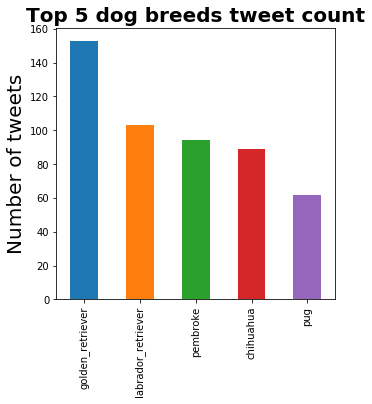

In [126]:
breed_count.plot(figsize = (5,5),kind='bar');
plt.xticks(rotation=90);
plt.title('Top 5 dog breeds tweet count', fontsize=20, fontweight='bold')
plt.ylabel('Number of tweets', fontsize=20);

We can see that apart from the dogs without names that were categorized as none, the most common dog breed is the Golden_Retriever followed by the Labrador_retriever.

In [127]:
source_count = df.source.value_counts()
source_count

Twitter for iPhone    1911
Twitter Web Client      28
TweetDeck               10
Name: source, dtype: int64

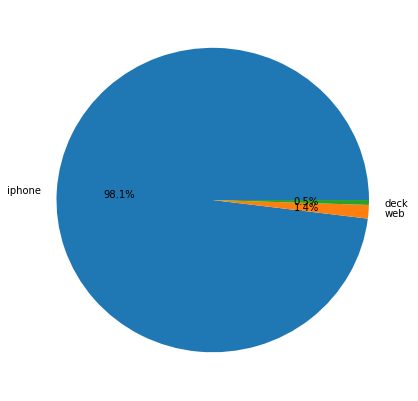

In [128]:
fig = plt.figure(figsize =(7, 7))
plt.pie(twitter_archive_clean['source'].value_counts().values, autopct='%.1f%%', labels = ['iphone', 'web', 'deck']);

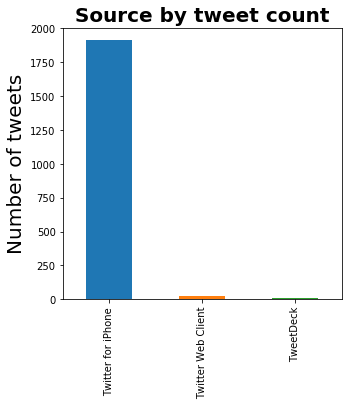

In [129]:
source = df['source'].value_counts()
source.plot(figsize = (5,5),kind='bar');
plt.xticks(rotation=90);
plt.title('Source by tweet count', fontsize=20, fontweight='bold')
plt.ylabel('Number of tweets', fontsize=20);

In [130]:
fav_counts_breed = df[df.breed != 'none']
fav_counts_breed = fav_counts_breed.groupby(['breed'])
fav_counts_breed = fav_counts_breed['favorite_count'].sum()
fav_counts_breed = fav_counts_breed.sort_values(ascending = False)
top5_breeds_fav_counts = fav_counts_breed.head()
top5_breeds_fav_counts

breed
golden_retriever      1914145
labrador_retriever    1253364
pembroke              1038797
chihuahua              717450
samoyed                583906
Name: favorite_count, dtype: int64

Text(0.5,1,'Favorite breed of dog')

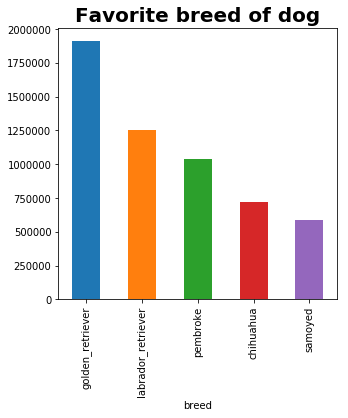

In [131]:
top5_breeds_fav_counts.plot(figsize = (5,5),kind='bar');
plt.xticks(rotation=90);
plt.title('Favorite breed of dog', fontsize=20, fontweight='bold')

In [248]:
name_count = df[df.name != 'None']
name_count = name_count.groupby(['name'])['favorite_count'].sum()
name_count = name_count.sort_values(ascending = False)
top5_name_count = name_count.head()
top5_name_count

name
Bo         185922
Charlie    115468
Zoey       113581
Lucy       110523
Duddles    107956
Name: favorite_count, dtype: int64

Text(0.5,1,'Most preffered dog name')

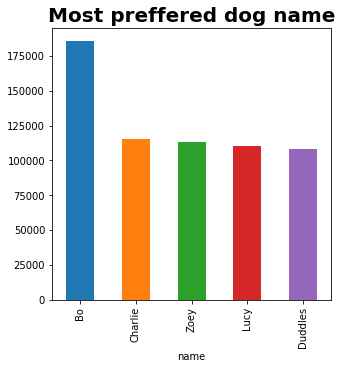

In [250]:
top5_name_count.plot(figsize = (5,5),kind='bar');
plt.xticks(rotation=90);
plt.title('Most preffered dog name', fontsize=20, fontweight='bold')

### Visualization